## Import Packages

In [1]:
### General libraries ###
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.display import SVG

##################################

### ML Models ###
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score

##################################

### Metrics ###
from sklearn import metrics
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error, classification_report

## Data Preprocessing

In [2]:
file = './input_data/car.data'
data = pd.read_csv(file, names=["buying", "maint", "doors", "persons", "lug_boot", "safety", "class_val"])

In [3]:
# Create category types.
buying_type = CategoricalDtype(['low','med','high','vhigh'], ordered=True)
maint_type = CategoricalDtype(['low','med','high','vhigh'], ordered=True)
doors_type = CategoricalDtype(['2','3','4','5more'], ordered=True)
persons_type = CategoricalDtype(['2','4','more'], ordered=True)
lug_boot_type = CategoricalDtype(['small','med','big'], ordered=True)
safety_type = CategoricalDtype(['low','med','high'], ordered=True)
class_type = CategoricalDtype(['unacc','acc','good','vgood'], ordered=True)

# Convert all categorical values to category type.
data.buying = data.buying.astype(buying_type)
data.maint = data.maint.astype(maint_type)
data.doors = data.doors.astype(doors_type)
data.persons = data.persons.astype(persons_type)
data.lug_boot = data.lug_boot.astype(lug_boot_type)
data.safety = data.safety.astype(safety_type)
data.class_val = data.class_val.astype(class_type)

In [4]:
# Convert categories into integers for each column.
data.buying=data.buying.replace({'low':0, 'med':1, 'high':2, 'vhigh':3})
data.maint=data.maint.replace({'low':0, 'med':1, 'high':2, 'vhigh':3})
data.doors=data.doors.replace({'2':0, '3':1, '4':2, '5more':3})
data.persons=data.persons.replace({'2':0, '4':1, 'more':2})
data.lug_boot=data.lug_boot.replace({'small':0, 'med':1, 'big':2})
data.safety=data.safety.replace({'low':0, 'med':1, 'high':2})
data.class_val=data.class_val.replace({'unacc':0, 'acc':1, 'good':2, 'vgood':3})

In [98]:
# Split attributes and value to predict
X=data[data.columns[1:]]
y=data['buying']

In [99]:
# Split to train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training Model

### Logistic Regression

In [83]:
# Initialize a Logistic Regression classifier.
logreg=LogisticRegression(solver='saga', multi_class='auto', random_state=101, n_jobs=-1)

# Train the classifier.
logreg.fit(X_train,y_train)

LogisticRegression(n_jobs=-1, random_state=101, solver='saga')

In [84]:
# Make predictions.
log_pred=logreg.predict(X_test)

# CV score
logreg_cv = cross_val_score(logreg,X_train,y_train,cv=10)

In [85]:
# The mean squared error (relative error).
print("Mean squared error (MSE): %.3f" % mean_squared_error(y_test, log_pred))

# Explained average absolute error (average error).
print("Mean absolute error (MAE): %.3f" % mean_absolute_error(y_test, log_pred))

# Explained variance score: 1 is perfect prediction.
print('Accuracy: %.3f' % logreg.score(X_test, y_test))

# CV Accuracy
print('CV Accuracy: %.3f' % logreg_cv.mean())

Mean squared error (MSE): 1.948
Mean absolute error (MAE): 1.040
Accuracy: 0.321
CV Accuracy: 0.325


### Confusion Matrix

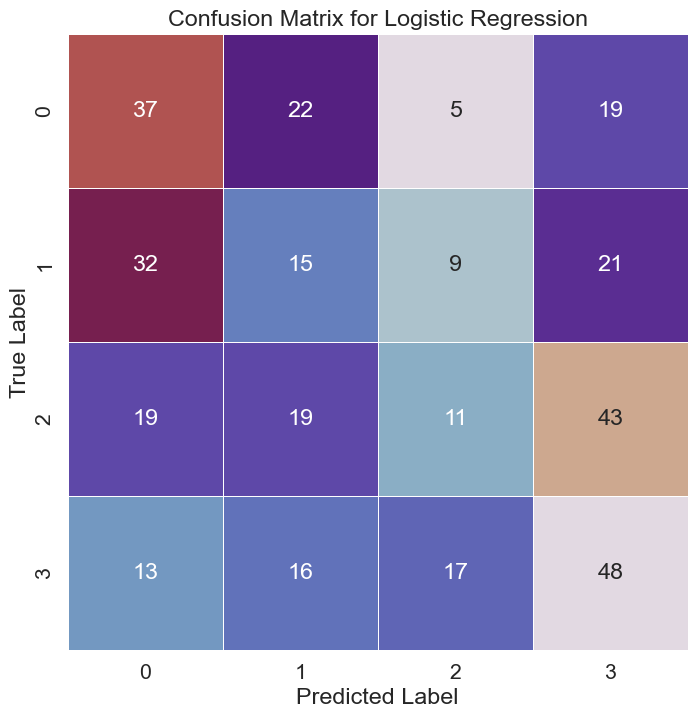

In [86]:
# Plot confusion matrix for Logistic regression.
logreg_matrix = confusion_matrix(y_test,log_pred)
plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
sns.heatmap(logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Logistic Regression');

### Tuning model with GridSearch

In [87]:
# Hyperparameters to be checked.
parameters = {'C':[0.0001,0.001, 0.01, 1, 0.1, 10, 100, 1000],
              'penalty':['none','l2'],
              'solver':['lbfgs','sag','saga','newton-cg']
             }

# Logistic Regression classifier.
default_logreg=LogisticRegression(multi_class='auto', random_state=42, n_jobs=-1)

# GridSearchCV estimator.
gs_logreg = GridSearchCV(default_logreg, parameters, cv=10, verbose=1)

# Train the GridSearchCV estimator and search for the best parameters.
gs_logreg.fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=LogisticRegression(n_jobs=-1, random_state=42),
             param_grid={'C': [0.0001, 0.001, 0.01, 1, 0.1, 10, 100, 1000],
                         'penalty': ['none', 'l2'],
                         'solver': ['lbfgs', 'sag', 'saga', 'newton-cg']},
             verbose=1)

In [88]:
# Make predictions with the best parameters.
gs_log_pred=gs_logreg.predict(X_test)

In [89]:
# Best parameters.
print("Best Logistic Regression Parameters: {}".format(gs_logreg.best_params_))

# The mean squared error (relative error).
print("Mean squared error (MSE): %.3f" % mean_squared_error(y_test, gs_log_pred))

# Explained average absolute error (average error).
print("Mean absolute error (MAE): %.3f" % mean_absolute_error(y_test, gs_log_pred))

# Cross validation accuracy for the best parameters.
print('CV Accuracy: %0.3f' % gs_logreg.best_score_)

# Accuracy: 1 is perfect prediction.
print('Accuracy: %0.3f' % (gs_logreg.score(X_test,y_test)))

Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Mean squared error (MSE): 1.928
Mean absolute error (MAE): 1.032
CV Accuracy: 0.326
Accuracy: 0.324


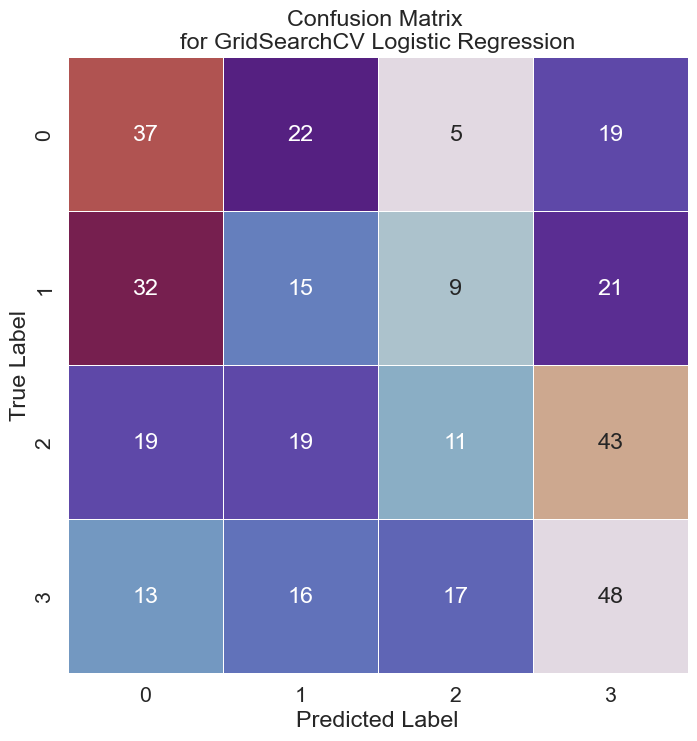

In [90]:
# Plot confusion matrix for GridSearchCV Logistic regression.
gs_logreg_matrix = confusion_matrix(y_test,log_pred)
plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
sns.heatmap(gs_logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix \nfor GridSearchCV Logistic Regression');

### Decision Tree

In [100]:
# Initialize a decision tree estimator.
tr = tree.DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)

# Train the estimator.
tr.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [101]:
# Make predictions.
tr_pred=tr.predict(X_test)

# CV score
tr_cv = cross_val_score(tr,X_train,y_train,cv=10)

In [102]:
# The mean squared error (relative error).
print("Mean squared error (MSE): %.3f" % mean_squared_error(y_test, tr_pred))

# Explained average absolute error (average error).
print("Mean absolute error (MAE): %.3f" % mean_absolute_error(y_test, tr_pred))

# Explained variance score: 1 is perfect prediction.
print('Accuracy: %.3f' % tr.score(X_test, y_test))

# CV Accuracy
print('CV Accuracy: %.3f' % tr_cv.mean())

Mean squared error (MSE): 2.081
Mean absolute error (MAE): 1.121
Accuracy: 0.263
CV Accuracy: 0.277


### Confusion Matrix

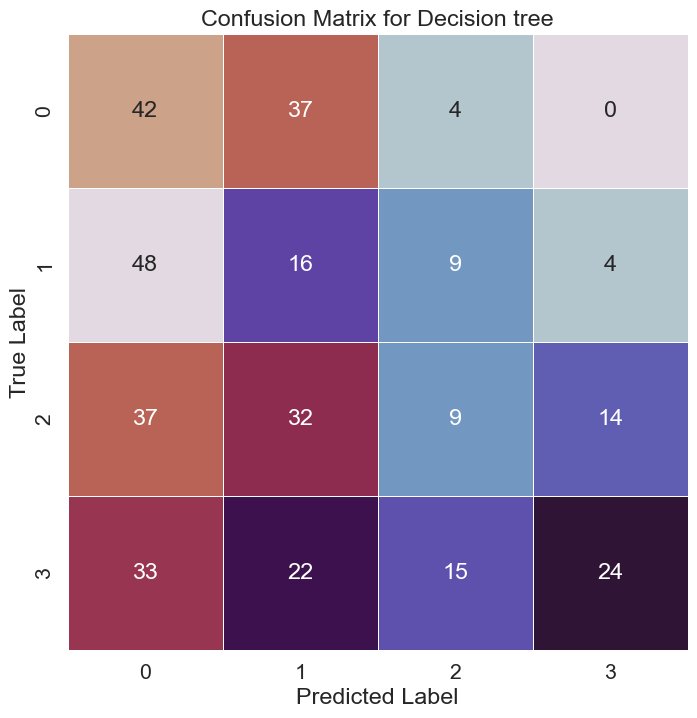

In [103]:
# Print confusion matrix for Decision tree.
tr_matrix = confusion_matrix(y_test,tr_pred)
plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
sns.heatmap(tr_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision tree');

### Tuning model with GridSearch

In [104]:
# Hyperparameters to be checked.
parameters = {'criterion':['gini','entropy'],
              'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
             }

# Default Decision tree estimator.
default_tr = tree.DecisionTreeClassifier(random_state=42)

# GridSearchCV estimator.
gs_tree = GridSearchCV(default_tr, parameters, cv=10, n_jobs=-1,verbose=1)

# Train the GridSearchCV estimator and search for the best parameters.
gs_tree.fit(X_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20]},
             verbose=1)

In [105]:
# Make predictions with the best parameters.
gs_tree_pred=gs_tree.predict(X_test)

In [106]:
# Best parameters.
print("Best Decision tree Parameters: {}".format(gs_tree.best_params_))

# The mean squared error (relative error).
print("Mean squared error (MSE): %.3f" % mean_squared_error(y_test, gs_tree_pred))

# Explained average absolute error (average error).
print("Mean absolute error (MAE): %.3f" % mean_absolute_error(y_test, gs_tree_pred))

# Cross validation accuracy for the best parameters.
print('CV accuracy: %0.3f' % gs_tree.best_score_)

# Accuracy: 1 is perfect prediction.
print('Accuracy: %0.3f' % (gs_tree.score(X_test,y_test)))

Best Decision tree Parameters: {'criterion': 'entropy', 'max_depth': 3}
Mean squared error (MSE): 1.671
Mean absolute error (MAE): 0.988
CV accuracy: 0.321
Accuracy: 0.298


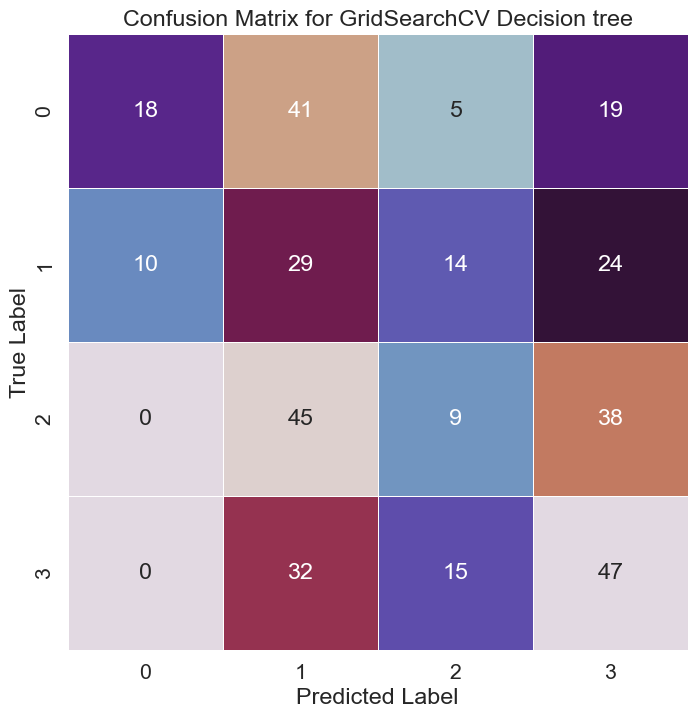

In [80]:
# Print confusion matrix for GridSearchCV Decision tree.
gs_tr_matrix = confusion_matrix(y_test,gs_tree_pred)
plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
sns.heatmap(gs_tr_matrix,annot=True, cbar=False, cmap='twilight', linewidth=0.5, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Decision tree');

## Prediction

The original problem was to predict the buying price (i.e. `buying`) given the following attributes

- Maintenance = High
- Number of doors = 4
- Lug Boot Size = Big
- Safety = High
- Class Value = Good

In [164]:
# input_data = [['high','4','','big','high','good']]
input_data = [['high','4','','big','high','good']]

input_df = pd.DataFrame(input_data, columns=["maint", "doors", "persons", "lug_boot", "safety", "class_val"])

input_df

,maint,doors,persons,lug_boot,safety,class_val
0,high,4,,big,high,good


In [165]:
# Convert all categorical values to category type.
input_df.maint = input_df.maint.astype(maint_type)
input_df.doors = input_df.doors.astype(doors_type)
input_df.persons = input_df.persons.astype(persons_type)
input_df.lug_boot = input_df.lug_boot.astype(lug_boot_type)
input_df.safety = input_df.safety.astype(safety_type)
input_df.class_val = input_df.class_val.astype(class_type)

# Convert categories into integers for each column.
input_df.maint=input_df.maint.replace({'low':0, 'med':1, 'high':2, 'vhigh':3})
input_df.doors=input_df.doors.replace({'2':0, '3':1, '4':2, '5more':3})
input_df.persons=input_df.persons.replace({'2':0, '4':1, 'more':2})
input_df.lug_boot=input_df.lug_boot.replace({'small':0, 'med':1, 'big':2})
input_df.safety=input_df.safety.replace({'low':0, 'med':1, 'high':2})
input_df.class_val=input_df.class_val.replace({'unacc':0, 'acc':1, 'good':2, 'vgood':3})

In [166]:
input_df

,maint,doors,persons,lug_boot,safety,class_val
0,2,2,NaN,2,2,2


### Logistic Regression

In [167]:
gs_log_pred_out=gs_logreg.predict(input_df)

In [168]:
gs_log_pred_out

array([0])

### Decision Tree

In [169]:
gs_tree_pred_out=gs_tree.predict(input_df)

In [170]:
gs_tree_pred_out

array([0])